In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
books=pd.read_csv('G:\Jupyter\Book\BX-Books.csv',sep=';',error_bad_lines=False,encoding='Latin-1')
ratings=pd.read_csv('G:\Jupyter\Book\BX-Book-Ratings.csv',sep=';',error_bad_lines=False,encoding='Latin-1')
users=pd.read_csv('G:\Jupyter\Book\BX-Users.csv',sep=';',error_bad_lines=False,encoding='Latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(ratings.shape)
ratings.head(10)

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [5]:
ratings['Book-Rating'].describe()

count    1.149780e+06
mean     2.866950e+00
std      3.854184e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: Book-Rating, dtype: float64

In [6]:
ratings.shape

(1149780, 3)

In [7]:
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


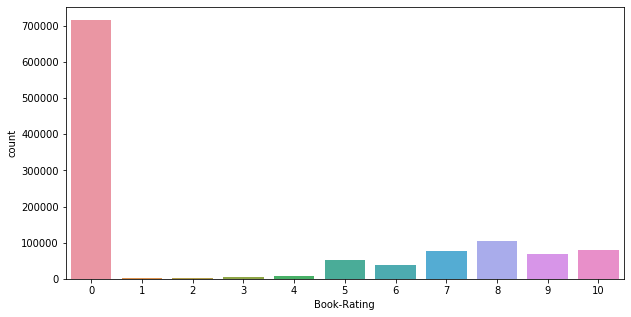

In [8]:
plt.figure(figsize=(10,5))
sb.countplot(x='Book-Rating',data=ratings)

In [9]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

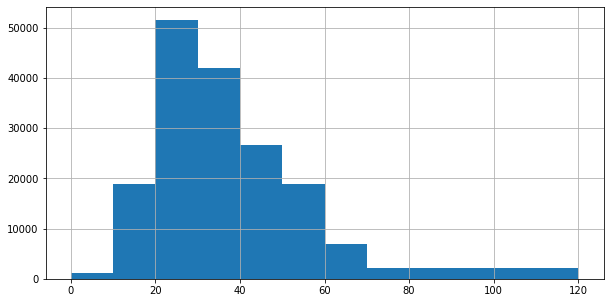

In [10]:
plt.figure(figsize=(10,5))
users['Age'].hist(bins=[0,10,20,30,40,50,60,70,120])

In [11]:
rating_df=pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
rating_df['rating_count']=ratings.groupby('ISBN')['Book-Rating'].count()
rating_df.rename(columns={'Book-Rating':'Mean_rating'},inplace =True)
rating_df.sort_values("rating_count",ascending=False).head()

,Mean_rating,rating_count
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [12]:
count=ratings['User-ID'].value_counts().reset_index()

In [13]:
count.head()

,index,User-ID
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850


In [14]:
count.rename(columns={'index':'User-ID','User-ID':'rating_count_PerUSer'},inplace=True)

In [15]:
count.tail()

,User-ID,rating_count_PerUSer
105278,158698,1
105279,17920,1
105280,277135,1
105281,275086,1
105282,187812,1


In [16]:
ratings=ratings.merge(count, on='User-ID')



In [17]:
ratings=ratings.merge(rating_df, on='ISBN',copy=False)

In [18]:
ratings.sort_values('rating_count',ascending=False).head()

,User-ID,ISBN,Book-Rating,rating_count_PerUSer,Mean_rating,rating_count
12039,195762,0971880107,0,1,1.019584,2502
10368,7125,0971880107,0,167,1.019584,2502
10375,8453,0971880107,3,2,1.019584,2502
10374,8361,0971880107,2,1,1.019584,2502
10373,7864,0971880107,0,39,1.019584,2502


In [19]:
ratings['rating_count_PerUSer'].max()

13602

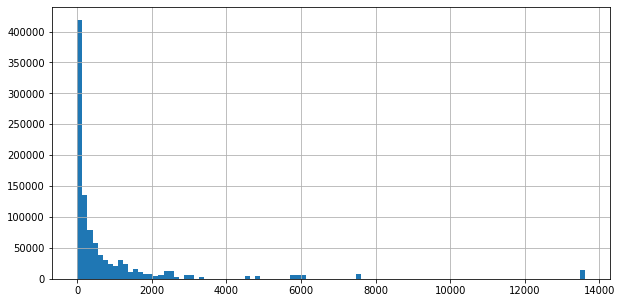

In [20]:
plt.figure(figsize=(10,5))
ratings['rating_count_PerUSer'][ratings['rating_count_PerUSer']>5].hist(bins=(100))

In [21]:
count['rating_count_PerUSer'].describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: rating_count_PerUSer, dtype: float64

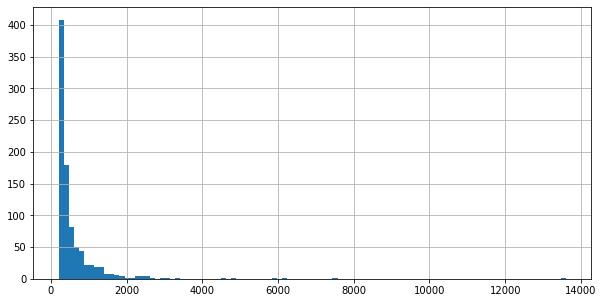

In [22]:
plt.figure(figsize=(10,5))
count['rating_count_PerUSer'][count['rating_count_PerUSer']>200].hist(bins=(100))

In [23]:
rating_df['rating_count'].describe()

count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: rating_count, dtype: float64

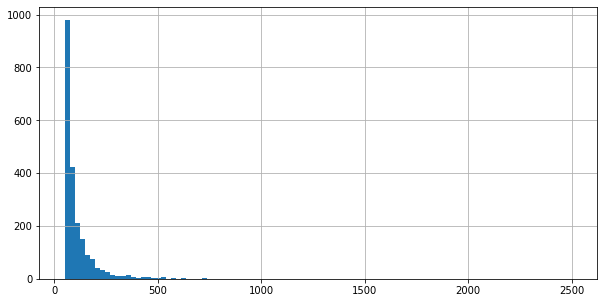

In [24]:
plt.figure(figsize=(10,5))
rating_df['rating_count'][rating_df['rating_count']>50].hist(bins=(100))

In [25]:
ratings=ratings.query('rating_count_PerUSer >=200')
ratings=ratings.query('rating_count >=75')

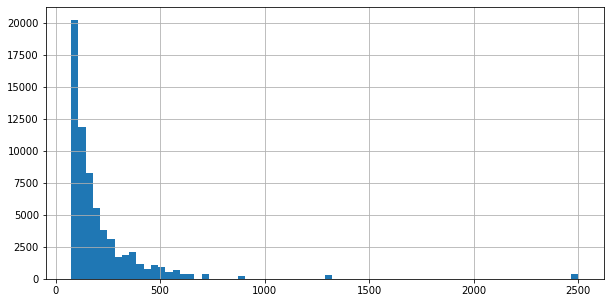

In [26]:
plt.figure(figsize=(10,5))
ratings['rating_count'].hist(bins=(70))

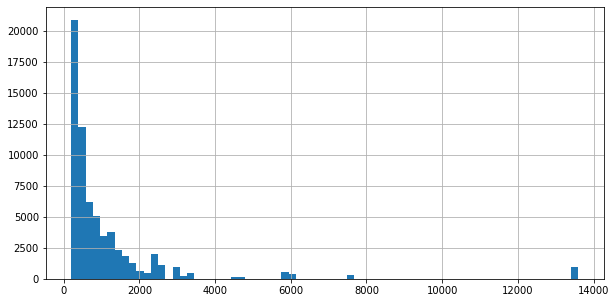

In [27]:
plt.figure(figsize=(10,5))
ratings['rating_count_PerUSer'].hist(bins=(70))

In [31]:
ratings.head()

,User-ID,ISBN,Book-Rating,rating_count_PerUSer,Mean_rating,rating_count
63,278418,0446520802,0,4533,4.060345,116
65,3363,0446520802,0,901,4.060345,116
66,7158,0446520802,10,400,4.060345,116
69,11676,0446520802,10,13602,4.060345,116
74,23768,0446520802,6,1708,4.060345,116


In [47]:
books_merged=ratings.merge(books,on='ISBN')
columns=['Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L','Year-Of-Publication']
books_merged.drop(columns,axis=1,inplace=True)
books_merged.head()

,User-ID,ISBN,Book-Rating,rating_count_PerUSer,Mean_rating,rating_count,Book-Title
0,278418,0446520802,0,4533,4.060345,116,The Notebook
1,3363,0446520802,0,901,4.060345,116,The Notebook
2,7158,0446520802,10,400,4.060345,116,The Notebook
3,11676,0446520802,10,13602,4.060345,116,The Notebook
4,23768,0446520802,6,1708,4.060345,116,The Notebook


In [45]:
books_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65036 entries, 0 to 65035
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User-ID               65036 non-null  int64  
 1   ISBN                  65036 non-null  object 
 2   Book-Rating           65036 non-null  int64  
 3   rating_count_PerUSer  65036 non-null  int64  
 4   Mean_rating           65036 non-null  float64
 5   rating_count          65036 non-null  int64  
 6   Book-Title            65036 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.0+ MB


In [52]:
from scipy.sparse import csr_matrix
books_merged=books_merged.drop_duplicates(['Book-Title','User-ID'])

In [53]:
books_pivot=books_merged.pivot(index='Book-Title', columns='User-ID',values='Book-Rating').fillna(0)

In [55]:
books_matrix=csr_matrix(books_pivot.values)

In [58]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(books_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [60]:
index=np.random.choice(books_pivot.shape[0])

distances,indices=knn.kneighbors(books_pivot.iloc[index,:].values.reshape(1,-1),n_neighbors=6)

In [61]:
Distance=distances.flatten()
Index=indices.flatten()

In [63]:
for i in range(len(Distance)):
    if i==0:
        print('Recomendation of Book {0} :\n'.format(books_pivot.index[index]))
    else:
        print('{0} {1} has distance of     :{2}, \n'.format(i, books_pivot.index[Index[i]],Distance[i]))

Recomendation of Book Pleading Guilty :

1 The Bourne Identity has distance of     :0.6322353879779915, 

2 Net Force has distance of     :0.674201607550462, 

3 Eyes of a Child has distance of     :0.708361460694088, 

4 The Final Judgment has distance of     :0.7133756775228777, 

5 Sudden Prey has distance of     :0.7492704870440222, 

